# Goal
The goal of this challenge is to build a model that predicts conversion rate and, based on the model, come up with ideas to improve revenue.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('/Users/yangzongkun/Desktop/sd/DS Take Home 1-3/1.conversion/conversion_data.csv')

In [3]:
df

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0
...,...,...,...,...,...,...
316195,US,26,1,Ads,9,0
316196,US,27,1,Direct,6,0
316197,China,25,0,Ads,4,0
316198,US,22,0,Seo,4,0


In [4]:
for column in df.columns:
    uniques = sorted(df[column].unique())
    print('{0:20s} {1:5d}\t'.format(column, len(uniques)), uniques[:5])
# #这个的好处在于不仅能看有多少个unique，还能看每一个的category，不用一个一个写码

country                  4	 ['China', 'Germany', 'UK', 'US']
age                     60	 [17, 18, 19, 20, 21]
new_user                 2	 [0, 1]
source                   3	 ['Ads', 'Direct', 'Seo']
total_pages_visited     29	 [1, 2, 3, 4, 5]
converted                2	 [0, 1]


In [5]:
#check for outlier
df.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


In [6]:
#Typically, age should be below 100. So, first let check outliers and clean the dataset
df[df['age']>100]

,country,age,new_user,source,total_pages_visited,converted
90928,Germany,123,0,Seo,15,1
295581,UK,111,0,Ads,10,1


In [7]:
df=df[df['age']<=100]
df

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0
...,...,...,...,...,...,...
316195,US,26,1,Ads,9,0
316196,US,27,1,Direct,6,0
316197,China,25,0,Ads,4,0
316198,US,22,0,Seo,4,0


In [8]:
#check for missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316198 entries, 0 to 316199
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              316198 non-null  object
 1   age                  316198 non-null  int64 
 2   new_user             316198 non-null  int64 
 3   source               316198 non-null  object
 4   total_pages_visited  316198 non-null  int64 
 5   converted            316198 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 16.9+ MB


In [9]:
#check for datatype
df.dtypes

country                object
age                     int64
new_user                int64
source                 object
total_pages_visited     int64
converted               int64
dtype: object

In [10]:
# to see the category
df.isnull().sum()

country                0
age                    0
new_user               0
source                 0
total_pages_visited    0
converted              0
dtype: int64

In [11]:
# to see rhe category
df.country.value_counts()

US         178092
China       76602
UK          48449
Germany     13055
Name: country, dtype: int64

In [12]:
df.source.value_counts()

Seo       155039
Ads        88739
Direct     72420
Name: source, dtype: int64

# Exploratory Data Analysis

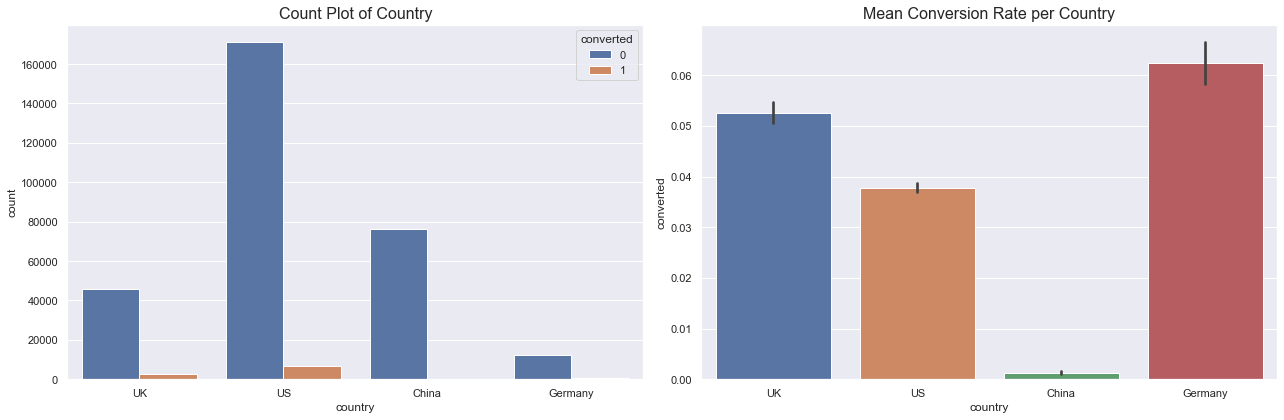

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='country', hue='converted', data=df, ax=ax[0])
ax[0].set_title('Count Plot of Country', fontsize=16)

sns.barplot(x='country', y='converted', data=df, ax=ax[1]);
ax[1].set_title('Mean Conversion Rate per Country', fontsize=16)
plt.tight_layout()
plt.show()

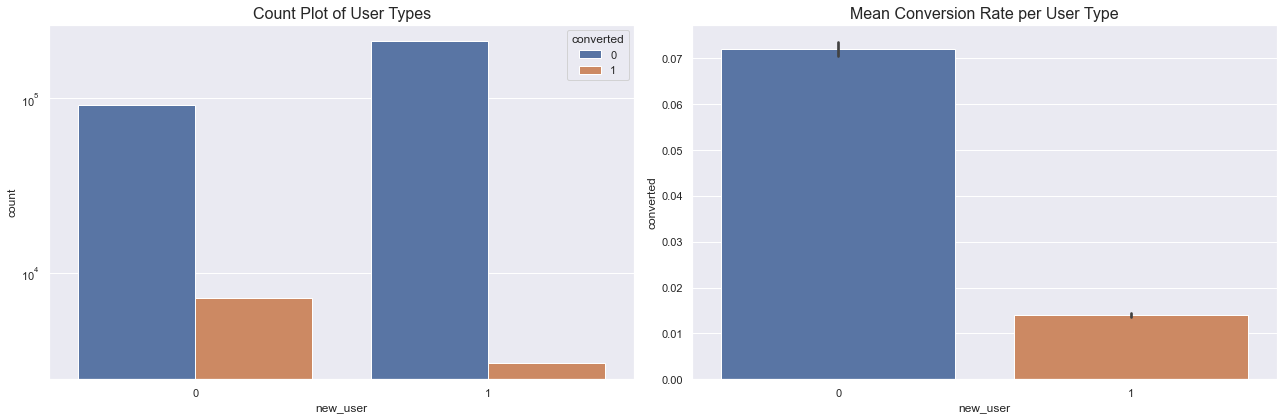

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='new_user', hue='converted', data=df, ax=ax[0])
ax[0].set_title('Count Plot of User Types', fontsize=16)
ax[0].set_yscale('log')
sns.barplot(x='new_user', y='converted', data=df, ax=ax[1]);
ax[1].set_title('Mean Conversion Rate per User Type', fontsize=16)
plt.tight_layout()
plt.show()

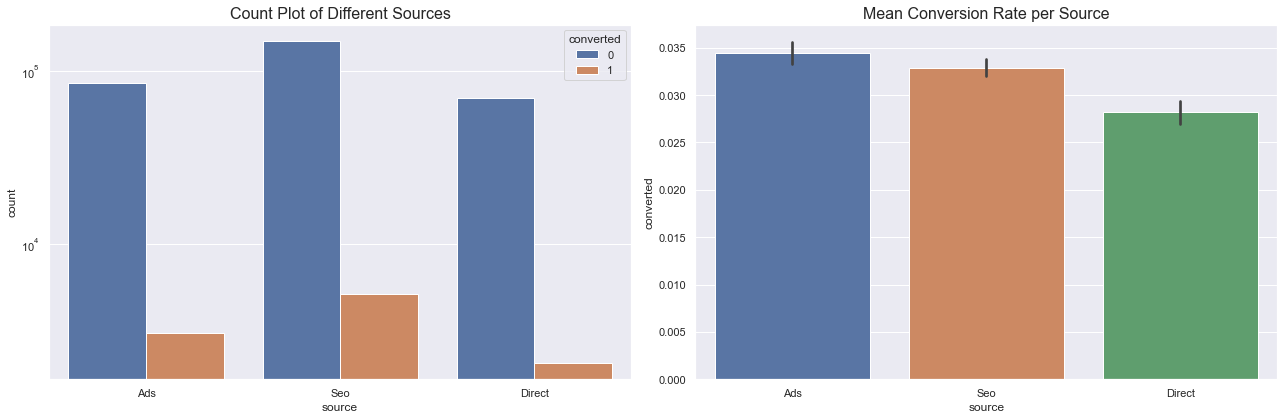

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='source', hue='converted', data=df, ax=ax[0])
ax[0].set_title('Count Plot of Different Sources', fontsize=16)
ax[0].set_yscale('log')
sns.barplot(x='source', y='converted', data=df, ax=ax[1]);
ax[1].set_title('Mean Conversion Rate per Source', fontsize=16)
plt.tight_layout()
plt.show()

/Users/yangzongkun/.conda/envs/untitled/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/yangzongkun/.conda/envs/untitled/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


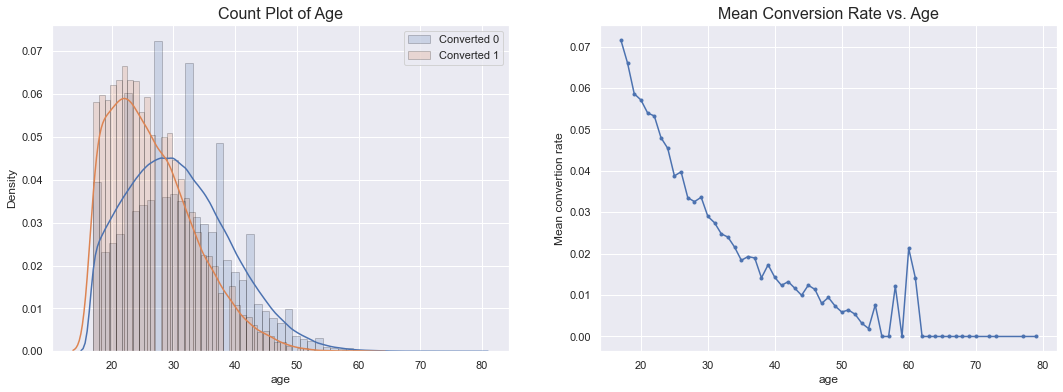

In [16]:
grouped = df[['age', 'converted']].groupby('age').mean().reset_index()

hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.distplot(df[df['converted'] == 0]['age'], label='Converted 0', 
             ax=ax[0], hist_kws=hist_kws)
sns.distplot(df[df['converted'] == 1]['age'], label='Converted 1', 
             ax=ax[0], hist_kws=hist_kws)
ax[0].set_title('Count Plot of Age', fontsize=16)
ax[0].legend()#右上角的lable


ax[1].plot(grouped['age'], grouped['converted'], '.-')
#The plot() method is used to create a line plot from one or more sets of data.
#using a dot-and-line style for the plot
ax[1].set_title('Mean Conversion Rate vs. Age', fontsize=16)
ax[1].set_xlabel('age')
ax[1].set_ylabel('Mean convertion rate')
ax[1].grid(True)
plt.show()

In [17]:
df[['age', 'converted']].groupby('age').mean()

,converted
age,
17,0.071607
18,0.066029
19,0.058616
20,0.057109
21,0.053985
22,0.053243
23,0.047990
24,0.045448
25,0.038782


/Users/yangzongkun/.conda/envs/untitled/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/yangzongkun/.conda/envs/untitled/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


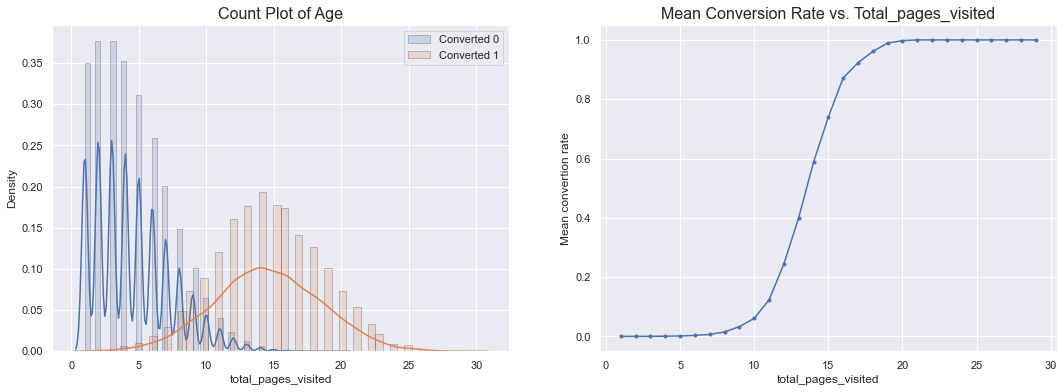

In [18]:
grouped = df[['total_pages_visited', 'converted']].groupby('total_pages_visited').mean().reset_index()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.distplot(df[df['converted'] == 0]['total_pages_visited'], 
             label='Converted 0', ax=ax[0], hist_kws=hist_kws)
sns.distplot(df[df['converted'] == 1]['total_pages_visited'], 
             label='Converted 1', ax=ax[0], hist_kws=hist_kws)
ax[0].set_title('Count Plot of Age', fontsize=16)
ax[0].legend()

ax[1].plot(grouped['total_pages_visited'], grouped['converted'], '.-')
ax[1].set_title('Mean Conversion Rate vs. Total_pages_visited', fontsize=16)
ax[1].set_xlabel('total_pages_visited')
ax[1].set_ylabel('Mean convertion rate')
ax[1].grid(True)
plt.show()


# Feature preprocessing

In [19]:
y=df['converted']
y

0         0
1         0
2         0
3         0
4         0
         ..
316195    0
316196    0
316197    0
316198    0
316199    0
Name: converted, Length: 316198, dtype: int64

In [20]:
to_drop=['converted']
x=df.drop(to_drop,axis=1)
x

,country,age,new_user,source,total_pages_visited
0,UK,25,1,Ads,1
1,US,23,1,Seo,5
2,US,28,1,Seo,4
3,China,39,1,Seo,5
4,US,30,1,Seo,6
...,...,...,...,...,...
316195,US,26,1,Ads,9
316196,US,27,1,Direct,6
316197,China,25,0,Ads,4
316198,US,22,0,Seo,4


In [21]:
#split data

from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.25, stratify = y, random_state=1) #stratified sampling
print('training data has ' + str(X_train.shape[0]) + ' observation with ' + str(X_train.shape[1]) + ' features') #shape[0]指的是有多少行，1指的是有多少列
print('test data has ' + str(X_test.shape[0]) + ' observation with ' + str(X_test.shape[1]) + ' features')

training data has 237148 observation with 5 features
test data has 79050 observation with 5 features


In [22]:

# One hot encoding
# another way: get_dummies
from sklearn.preprocessing import OneHotEncoder

def OneHotEncoding(df, enc, categories):  
  transformed = pd.DataFrame(enc.transform(df[categories]).toarray(), columns=enc.get_feature_names(categories))
  return pd.concat([df.reset_index(drop=True), transformed], axis=1).drop(categories, axis=1)

categories = ['country']
enc_ohe = OneHotEncoder()
enc_ohe.fit(X_train[categories])

X_train = OneHotEncoding(X_train, enc_ohe, categories)
X_test = OneHotEncoding(X_test, enc_ohe, categories)
 

In [23]:
X_train.head()

,age,new_user,source,total_pages_visited,country_China,country_Germany,country_UK,country_US
0,44,0,Direct,8,0.0,0.0,1.0,0.0
1,23,1,Ads,4,0.0,0.0,1.0,0.0
2,22,0,Seo,2,1.0,0.0,0.0,0.0
3,21,0,Seo,1,0.0,0.0,0.0,1.0
4,29,1,Seo,2,0.0,0.0,1.0,0.0


In [24]:
X_test.head()

,age,new_user,source,total_pages_visited,country_China,country_Germany,country_UK,country_US
0,23,1,Direct,2,0.0,0.0,0.0,1.0
1,28,1,Seo,2,0.0,0.0,1.0,0.0
2,35,0,Seo,6,0.0,0.0,0.0,1.0
3,24,1,Direct,11,0.0,0.0,1.0,0.0
4,45,0,Seo,5,0.0,0.0,0.0,1.0


In [25]:
# One hot encoding
# another way: get_dummies

def OneHotEncoding(df, enc, categories):  
  transformed = pd.DataFrame(enc.transform(df[categories]).toarray(), columns=enc.get_feature_names(categories))
  return pd.concat([df.reset_index(drop=True), transformed], axis=1).drop(categories, axis=1)

categories = ['source']
enc_ohe1 = OneHotEncoder()
enc_ohe1.fit(X_train[categories])

X_train = OneHotEncoding(X_train, enc_ohe1, categories)
X_test = OneHotEncoding(X_test, enc_ohe1, categories)

In [26]:
X_train.head()

,age,new_user,total_pages_visited,country_China,country_Germany,country_UK,country_US,source_Ads,source_Direct,source_Seo
0,44,0,8,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,23,1,4,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,22,0,2,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,21,0,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,29,1,2,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [27]:
X_test.head()

,age,new_user,total_pages_visited,country_China,country_Germany,country_UK,country_US,source_Ads,source_Direct,source_Seo
0,23,1,2,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,28,1,2,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,35,0,6,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,24,1,11,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,45,0,5,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [28]:
num_cols=x.columns[x.dtypes == 'int64']
num_cols

Index(['age', 'new_user', 'total_pages_visited'], dtype='object')

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train[num_cols])
X_train[num_cols] = scaler.transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [30]:
X_train

,age,new_user,total_pages_visited,country_China,country_Germany,country_UK,country_US,source_Ads,source_Direct,source_Seo
0,1.624746,-1.473597,0.934796,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,-0.915574,0.678612,-0.261842,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,-1.036541,-1.473597,-0.860161,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-1.157509,-1.473597,-1.159320,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,-0.189768,0.678612,-0.860161,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
237143,0.898941,0.678612,-1.159320,0.0,1.0,0.0,0.0,0.0,0.0,1.0
237144,-0.068800,0.678612,-0.561002,0.0,0.0,0.0,1.0,0.0,0.0,1.0
237145,-0.189768,0.678612,-0.561002,1.0,0.0,0.0,0.0,0.0,0.0,1.0
237146,0.415070,0.678612,0.635636,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [31]:
X_test

,age,new_user,total_pages_visited,country_China,country_Germany,country_UK,country_US,source_Ads,source_Direct,source_Seo
0,-0.915574,0.678612,-0.860161,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,-0.310736,0.678612,-0.860161,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.536038,-1.473597,0.336477,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,-0.794606,0.678612,1.832274,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.745714,-1.473597,0.037317,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
79045,1.261844,0.678612,-1.159320,0.0,0.0,0.0,1.0,0.0,0.0,1.0
79046,0.173135,-1.473597,0.037317,0.0,0.0,1.0,0.0,0.0,0.0,1.0
79047,1.019908,-1.473597,-0.261842,0.0,0.0,0.0,1.0,1.0,0.0,0.0
79048,0.415070,-1.473597,-1.159320,0.0,0.0,1.0,0.0,0.0,0.0,1.0


# Model Training and result evaluation

Two methods:

1.from sklearn.ensemble import RandomForestClassifier

2.H20

## Method 1

In [32]:
from sklearn.ensemble import RandomForestClassifier
classifier_RF = RandomForestClassifier()

In [33]:
#Train the model
classifier_RF.fit(X_train,y_train)

RandomForestClassifier()

In [34]:
# Prediction of test data
classifier_RF.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [35]:
classifier_RF.score(X_test, y_test)

0.9838203668564199

In [36]:
# Use 5-fold Cross Validation to get the accuracy for model
model_names = ['Random Forest']
model_list = [ classifier_RF]
count = 0

for classifier in model_list:
    cv_score = model_selection.cross_val_score(classifier, X_train, y_train, cv=5)
    print(cv_score)
    print('Model accuracy of ' + model_names[count] + ' is ' + str(cv_score.mean()))
    count += 1

[0.98425047 0.98429264 0.98519924 0.98492484 0.98551519]
Model accuracy of Random Forest is 0.9848364766604518


In [37]:
X_RF = x.copy()

X_RF = OneHotEncoding(X_RF, enc_ohe, ['country'])
X_RF = OneHotEncoding(X_RF, enc_ohe1, ['source'])

X_RF.head()

,age,new_user,total_pages_visited,country_China,country_Germany,country_UK,country_US,source_Ads,source_Direct,source_Seo
0,25,1,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,23,1,5,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,28,1,4,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,39,1,5,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,30,1,6,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [38]:
# check feature importance of random forest for feature selection

forest = RandomForestClassifier()
forest.fit(X_RF, y)

importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for ind in range(x.shape[1]):
  print ("{0} : {1}".format(X_RF.columns[indices[ind]],round(importances[indices[ind]], 4)))

Feature importance ranking by Random Forest Model:
total_pages_visited : 0.8217
age : 0.1009
new_user : 0.0386
country_China : 0.0232
country_US : 0.0038


# Method 2: H20

In [51]:
import h2o
from h2o.frame import H2OFrame
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.grid.grid_search import H2OGridSearch

In [52]:
# Initialize H2O cluster
import h2o
h2o.init()
h2o.remove_all()


Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,22 hours 40 mins
H2O_cluster_timezone:,America/Los_Angeles
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.3
H2O_cluster_version_age:,20 days
H2O_cluster_name:,H2O_from_python_yangzongkun_wzd7cz
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.430 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [60]:
# Transform to H2O Frame, and make sure the target variable is categorical
h2o_df = H2OFrame(df)

h2o_df['new_user'] = h2o_df['new_user'].asfactor()
h2o_df['converted'] = h2o_df['converted'].asfactor()

h2o_df.summary()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


/var/folders/kj/gjbr9xrs6ns8dc9jgs1f619h0000gn/T/ipykernel_29041/429283149.py:7: H2ODeprecationWarning: ``summary()`` is deprecated, please use ``show_summary()`` or ``get_summary()`` instead
  h2o_df.summary()


,country,age,new_user,source,total_pages_visited,converted
type,enum,int,enum,enum,int,enum
mins,,17.0,,,1.0,
mean,,30.56931100133461,,,4.872918234777001,
maxs,,79.0,,,29.0,
sigma,,8.268957596421435,,,3.3410533442156285,
zeros,,0,,,0,
missing,0,0,0,0,0,0
0,UK,25.0,1,Ads,1.0,0
1,US,23.0,1,Seo,5.0,0
2,US,28.0,1,Seo,4.0,0


In [61]:
# Split into 75% training and 25% test dataset
strat_split = h2o_df['converted'].stratified_split(test_frac=0.25, seed=42)

train = h2o_df[strat_split == 'train']
test = h2o_df[strat_split == 'test']

feature = ['country', 'age', 'new_user', 'source', 'total_pages_visited']
target = 'converted'



In [62]:
# Build random forest model
model = H2ORandomForestEstimator(balance_classes=True, ntrees=100, max_depth=20, 
                                 mtries=-1, seed=42, score_each_iteration=True)
#The H2ORandomForestEstimator class is used to create a new Random Forest model
#These include balance_classes which indicates whether to balance the class distribution in the training data
#In a binary classification problem, where the classes are "positive" and "negative", balancing the class distribution can ensure that there are roughly equal numbers of positive and negative examples in the training data. This can be useful when the classes are highly imbalanced (e.g. there are many more negative examples than positive examples), as it can help the model to learn from both classes more effectively. 
# mtries which specifies the number of variables to randomly select at each split in the trees
# a value of -1 indicates that all variables should be considered at each split. This means that the model will use all available features to make predictions, which can potentially improve the model's performance. However, it can also make the model more computationally expensive and may lead to overfitting if the number of features is very large.
# score_each_iteration which indicates whether to score the model after each iteration of training.
model.train(x=feature, y=target, training_frame=train)


drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: DRF_model_python_1670902059772_204


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    100                100                         3.20408e+06            19           20           19.99         1677          2989          2542.26

ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.11846613631537281
RMSE: 0.3441890996463613
LogLoss: 0.3764399306371099
Mean Per-Class Error: 0.04077296202014859
AUC: 0.9928548908904044
AUCPR: 0.9916492588930318
Gini: 0.9857097817808087

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.02780413173063362
       0       1       Error    Rate
-----  ------  ------  -------  ------------------
0      216822  12678   0.0552   (12678.0/229500.0)
1      6037    223471  0.0263   (6037.0/229508.0)
Total  222859  236149  0.0408   (18715.0/459008.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.0278041    0.959809  378
max f2                       0.00969061   0.977572  389
max f0point5                 0.0865393    0.96198   352
max accuracy                 0.0292331    0.959253  377
max precision                0.990718     0.999493  6
max recall                   0.00273107   1         394
max specificity              0.999482     0.999996  0
max absolute_mcc             0.0278041    0.918839  378
max min_per_class_accuracy   0.0452861    0.957705  370
max mean_per_class_accuracy  0.0292331    0.959253  377
max tns                      0.999482     229499    0
max fns                      0.999482     228280    0
max fps                      6.84159e-05  229500    399
max tps                      0.00273107   229508    394
max tnr                      0.999482     0.999996  0
max fnr                      0.999482     0.994649  0
max fpr                      6.84159e-05  1         399
max tpr                      0.00273107   1         394

Gains/Lift Table: Avg response rate: 50.00 %, avg score: 31.94 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100085                   0.994843           1.99822   1.99822            0.999129         0.997562     0.999129                    0.997562            0.0199993       0.0199993                  99.8224   99.8224            0.0199819
2        0.0200018                   0.990664           1.99953   1.99888            0.999782         0.992752     0.999455                    0.995159            0.0199819       0.0399812                  99.9529   99.8876            0.0399594
3        0.0300038                   0.985929           1.99779   1.99851            0.998911         0.988318     0.999274                    0.992878            0.0199819       0.0599631                  99.7787   99.8513            0.0599195
4        0.0400015                   0.98142            1.99866   1.99855            0.999346         0.983642     0.999292                    0.99057             0.0199819       0.0799449                  99.8658   99.8549            0.0798883
5        0.0500013                   0.976922           1.99822   1.99848            0.999129    

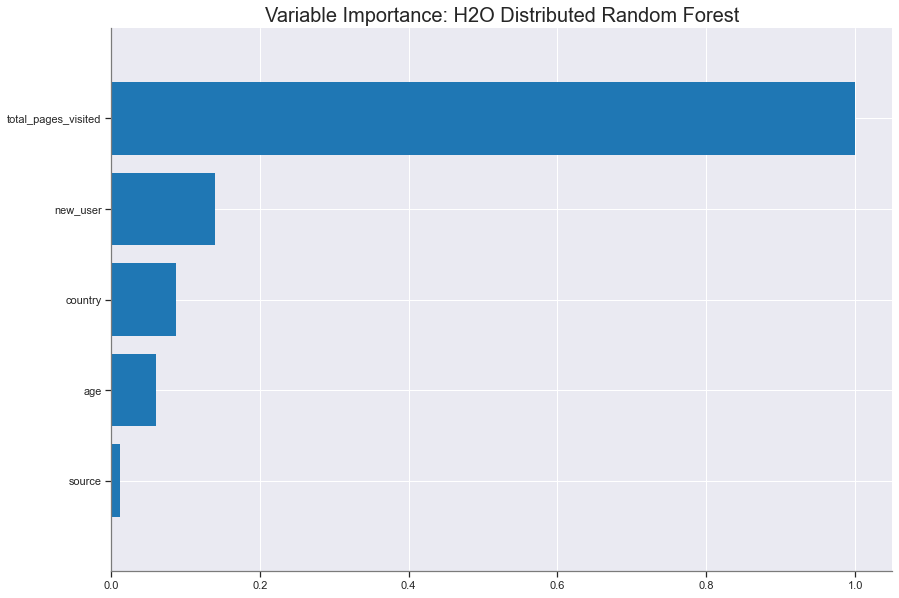

<Figure size 432x288 with 0 Axes>

In [63]:
model.varimp_plot()
#This code uses the varimp_plot() method to create a plot of the variable importance for a trained H2O model.

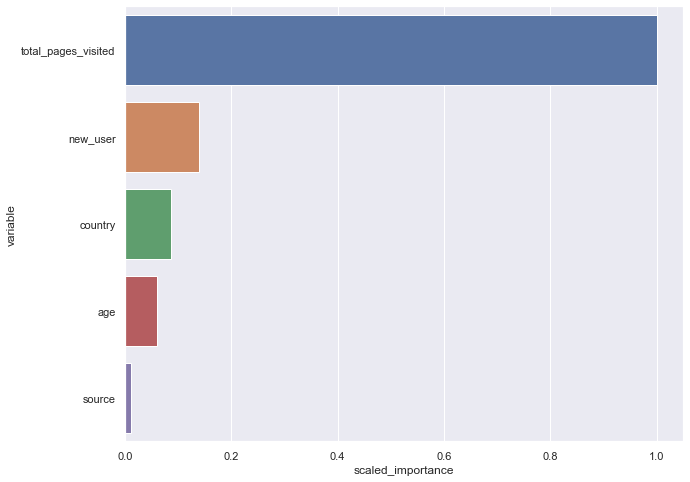

In [64]:
# Feature importance
importance = model.varimp(use_pandas=True)

fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x='scaled_importance', y='variable', data=importance)
plt.show()


In [65]:
from sklearn.metrics import auc, roc_curve, classification_report


In [66]:
# Make predictions

train_true = train.as_data_frame()['converted'].values
test_true = test.as_data_frame()['converted'].values
train_pred = model.predict(train).as_data_frame()['p1'].values
test_pred = model.predict(test).as_data_frame()['p1'].values

train_fpr, train_tpr, _ = roc_curve(train_true, train_pred)
test_fpr, test_tpr, _ = roc_curve(test_true, test_pred)

train_auc = np.round(auc(train_fpr, train_tpr), 3)
test_auc = np.round(auc(test_fpr, test_tpr), 3)

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [68]:
# Classification report
print(classification_report(y_true=test_true, y_pred=(test_pred > 0.5).astype(int)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     76500
           1       0.84      0.63      0.72      2550

    accuracy                           0.98     79050
   macro avg       0.91      0.81      0.86     79050
weighted avg       0.98      0.98      0.98     79050



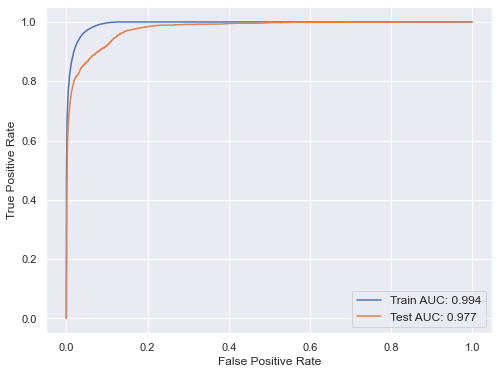

In [69]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(train_fpr, train_tpr, label='Train AUC: ' + str(train_auc))
ax.plot(test_fpr, test_tpr, label='Test AUC: ' + str(test_auc))
ax.set_xlabel('False Positive Rate', fontsize=12)
ax.set_ylabel('True Positive Rate', fontsize=12)
ax.legend(fontsize=12)
plt.show()

PartialDependencePlot progress: |████████████████████████████████████████████████| (done) 100%


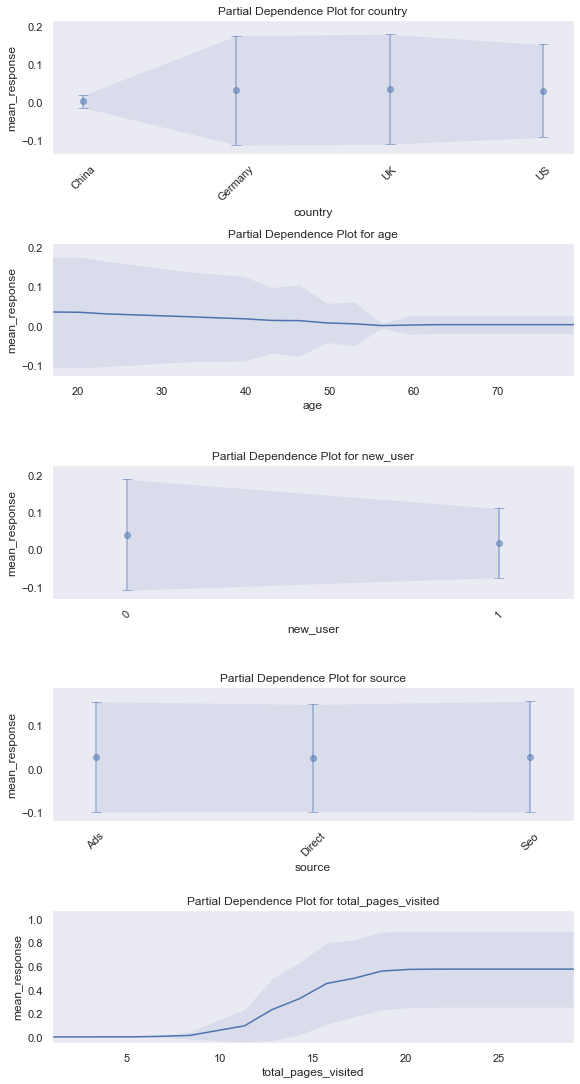

In [70]:
_ = model.partial_plot(train, cols=feature, figsize=(8, 15))
#which shows the marginal effect one or more features have on the predicted outcome of a machine learning model. 

In [71]:
# Shutdown h2o instance
h2o.cluster().shutdown()

H2O session _sid_8421 closed.
